In [1]:
import ML_func_happy as mlf
import pandas as pd

### Thank you, Open-Meteo historical weather API, for serving the ERA5 dataset!

This project manipulates and presents data from the ERA5 historical weather reanalysis dataset.
The ERA5 was created by the European Copernicus Climate Change Service information 2022,
in collaboration with the European Centre for Medium-Range Weather Forecasts. 
We are deeply grateful to the Open-Meteo historical weather API
https://open-meteo.com/en/docs/historical-weather-api
who made this data easily available.


### Location
In the next cell, enter the latitude and longitude of the location whose seasons you want to model.<br>
Seas, including islands like Barbados; and polar regions are not covered by the Open-Meteo historical  weather API.

In [2]:
# kolkata
latitude = 22.6263
longitude = 88.4010

### Hyper-parameters

We run several k-means clustering models, smooth out the results, and then pick the best.

You can set 
 - the number of components used by the Principal Component Analysis applied to 22-dimensional rescaled weather data, to be fed into the cluster models; and
 - the random state used by all k-means clustering models.

For each k-means clustering model, you can set
 - the weight given to date components when they are added to the output of the PCA analysis, before running the k-means algorithm; and
 - the number of clusters in the model - some clusters will be lost in the smoothing process.

<b> Totally fine to leave as is! </b>

In [3]:
# the number of principal components kept in PCA
# keep between 10 and 20
# input has 22 columns, and our code explicitly looks at the first 10.
# speed and output seem about the same for these values
comps = 20

# random state used by all K-means cluster models
# bigger inputs seem to result in messier models that are harder to smooth
randosta = 1

# these lists must have the same length: the number of models we run
# the number of clusters requested
klist = [5,5,5,6,6,6,7,7,7]
# the weight given to date data:
#  w=1 results in very smooth seasons that say nothing about the weather
#  w=0 results in weather-meaningful, but very hard to smooth out clusters
wlist = [0.12, 0.14, 0.15]*3

hyper_parameters = (comps ,klist, wlist, randosta)

### Run the models!
Takes ~30 seconds to execute, most of that is the one API call to get data.<br>
Reports the explanatory power of the PCA components, and a technical measure used to pick the best model. Guilt measures how much we had to change the outputs in the smoothing process, and how fragmented the final output is. <br>

In [4]:
seasons = mlf.get_seasons(latitude, longitude, 2001, 2020, hyper_parameters)

5 principal components explain 0.9003669539906874
6 principal components explain 0.9231667326418004
7 principal components explain 0.9410978715039661
8 principal components explain 0.9560062805112897
9 principal components explain 0.9687386265745791
season k5 w0.12 r1 has guilt 0.2857142857142857
season k5 w0.14 r1 has guilt 0.2857142857142857
season k5 w0.15 r1 has guilt 0.2857142857142857
season k6 w0.12 r1 has guilt 0.606060606060606
season k6 w0.14 r1 has guilt 0.606060606060606
season k6 w0.15 r1 has guilt 0.606060606060606
season k7 w0.12 r1 has guilt 0.4428571428571429
season k7 w0.14 r1 has guilt 0.41558441558441556
season k7 w0.15 r1 has guilt 0.43939393939393934


### Seasons on calendar circle
Three dots to a month. Year starts at the top and goes clockwise:
- January starts at the top
- April starts on the right
- July starts at the top
- October starts on the left

Same color means same season: similar weather.

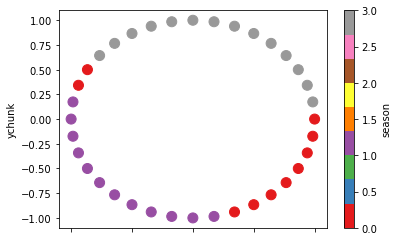

In [5]:
mlf.plot_labels(seasons[0])

### Seasons weather

In [6]:
mlf.pretty_season_weather(seasons[1])

season,0,1,3
High Temp,94.00,90.00,83.00
Low Temp,78.00,80.00,62.00
Percent Cloudy,25.00,60.00,11.00
Hours of rain/snow,3.10,10.20,0.70
Rain total,0.14,0.37,0.02
Snow total,0.00,0.00,0.00
Wind,6.00,6.00,4.00
Humidity,76.00,85.00,72.00
